Практическое домашнее задание к семинару от 06-02-2024:

Надо сделать хотя бы одно задание:

1. Нарисуйте сами в Paint цифру пером и подайте на вход вашей нейронной сети. Для работы с рисунками можно использовать Pillow.
2. По желанию - обучите нейронную сеть от SKLEARN и потестируйте.

### Задача № 2: Обучение и тестирование нейронной сети с помощью модуля scikit-learn

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score


In [2]:
# Загрузка набора данных MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# Преобразование изображений в одномерные массивы
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [4]:
# Нормализация входных данных в диапазон [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [9]:
# Создание многослойного перцептрона из двух слоёв в 100 и 50 нейронов соответственно
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=10, alpha=1e-4,
                    solver='adam', verbose=10, random_state=42,
                    learning_rate_init=0.001)

In [10]:
# Тренировка модели
history_mlp_model = mlp_model.fit(X_train, y_train)

Iteration 1, loss = 0.43321682
Iteration 2, loss = 0.16969375
Iteration 3, loss = 0.12098649
Iteration 4, loss = 0.09595661
Iteration 5, loss = 0.07886500
Iteration 6, loss = 0.06554285
Iteration 7, loss = 0.05720116
Iteration 8, loss = 0.04697832
Iteration 9, loss = 0.04134115
Iteration 10, loss = 0.03631691


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


In [11]:
# Прогнозирование значений на тестовой выборке
y_pred = mlp_model.predict(X_test)

In [12]:
# Расчет точности прогнозирования
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9744


Отрисовка графиков точности и ошибок при обучении

In [26]:
train_accuracies = []
test_accuracies = []
losses = []

In [27]:
batch_size = 128
epochs = 10
for epoch in range(epochs):
    print(f'Эпоха {epoch + 1}/{epochs}')
    X_batch = X_train[epoch:epoch + batch_size]
    y_batch = y_train[epoch:epoch + batch_size]

    mlp_model.partial_fit(X_batch, y_batch)

    train_pred = mlp_model.predict(X_batch)
    train_accuracy = accuracy_score(y_batch, train_pred)
    train_accuracies.append(train_accuracy)

    test_pred = mlp_model.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_pred)
    test_accuracies.append(test_accuracy)

    loss = mlp_model.loss_
    losses.append(loss)

Эпоха 1/10
Iteration 16889, loss = 0.00074877
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Эпоха 2/10
Iteration 16890, loss = 0.00075042
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Эпоха 3/10
Iteration 16891, loss = 0.00075306
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Эпоха 4/10
Iteration 16892, loss = 0.00075252
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Эпоха 5/10
Iteration 16893, loss = 0.00075217
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Эпоха 6/10
Iteration 16894, loss = 0.00076961
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Эпоха 7/10
Iteration 16895, loss = 0.00076842
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Эпоха 8/10
Iteration 16896, loss = 0.00076947
Tr

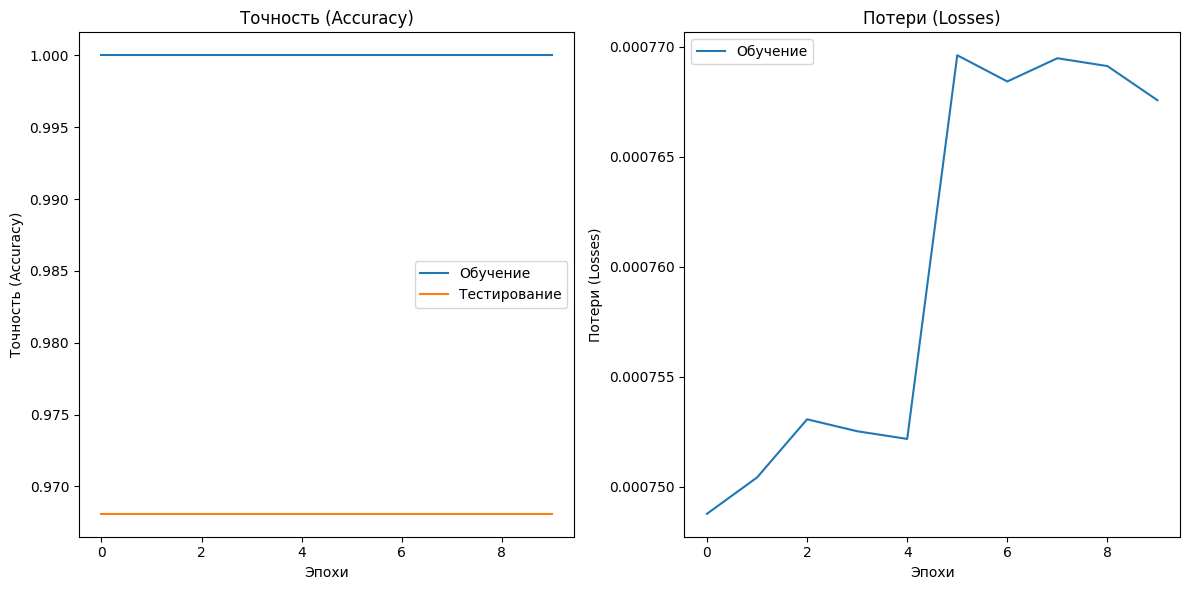

In [29]:
# Собственно изображение графиков
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_accuracies, label='Обучение')
plt.plot(test_accuracies, label='Тестирование')
plt.title('Точность (Accuracy)')
plt.xlabel('Эпохи')
plt.ylabel('Точность (Accuracy)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(losses, label='Обучение')
plt.title('Потери (Losses)')
plt.xlabel('Эпохи')
plt.ylabel('Потери (Losses)')
plt.legend()

plt.tight_layout()
plt.show()